# Weighted classification: A bayesian approach

## Imports

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Global variables

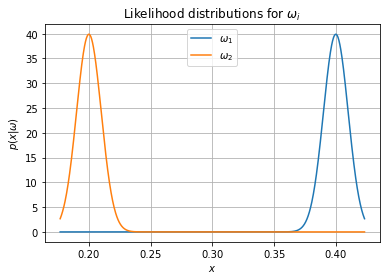

In [3]:
# Likelihoods
likelihood1 = stats.norm(loc=0.4, scale=np.sqrt(0.0001))
likelihood2 = stats.norm(loc=0.2, scale=np.sqrt(0.0001))

# Weights
lambda12 = 250
lambda21 = 100000

# Prior
prior1 = 1/25
prior2 = 24/25

# Plot
fig, ax = plt.subplots()

x = np.linspace(
        min(likelihood1.ppf(0.01), likelihood2.ppf(0.01)),
        max(likelihood1.ppf(0.99), likelihood2.ppf(0.99)),
        1000        
    )


ax.plot(x, likelihood1.pdf(x), label="$\omega_1$")
ax.plot(x, likelihood2.pdf(x), label="$\omega_2$")
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x|\omega)$')
ax.set_title('Likelihood distributions for $\omega_i$')
ax.legend()
ax.grid()

## Plot posterior decision boundary

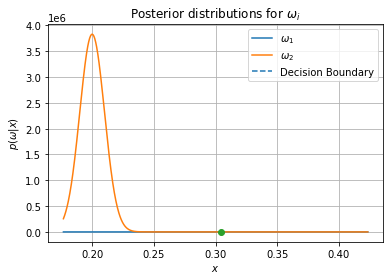

In [4]:
# Intersection
idx = int(np.argwhere(
    np.diff(np.sign(lambda12*prior1*likelihood1.pdf(x) - lambda21*prior2*likelihood2.pdf(x)))
    ).flatten())

# Plot
fig, ax = plt.subplots()
ax.plot(x, lambda12*prior1*likelihood1.pdf(x), label="$\omega_1$")
ax.plot(x, lambda21*prior2*likelihood2.pdf(x), label="$\omega_2$")

ax.set_xlabel('$x$')
ax.set_ylabel('$p(\omega|x)$')
ax.set_title('Posterior distributions for $\omega_i$')
ax.plot(x[idx], lambda12*prior1*likelihood1.pdf(x[idx]), marker='o')
ax.vlines(x[idx], ymin=0, ymax=lambda12*prior1*likelihood1.pdf(x[idx]), linestyles='dashed', label="Decision Boundary")
ax.legend()
ax.grid()

In [5]:
x[idx]

0.30456531402742254

Formula for average risk according to 7.12 in textbook:

$$
    r = \sum_{k=1}^M P(\omega_k)r_k = \sum_{i=1}^M \int_{r_i} 
    (\sum_{k=i}^{M}\lambda_{ki}P(\omega_k)p(\boldsymbol{x|\omega_k})) \, d\boldsymbol{x}
$$

Which in our case (since $\lambda_{11} = \lambda_{22} = 0$) becomes

$$
    r = \int_{r_1} \lambda_{21} p(\omega_2) p(x | \omega_2) \, dx + \int_{r_2} \lambda_{12} p(\omega_1) p(x | \omega_1)
$$

In [6]:
lambda21*prior2*(1-likelihood2.cdf(x[idx])) + lambda12*prior1*(likelihood1.cdf(x[idx]))

6.906663516023024e-21

## Contour lines 

In [7]:
mu1 = np.array([3, 3])
mu2 = np.array([3, -2])
sigma1 = np.array([[0.5, 0], [0, 2]])
sigma2 = np.array([[2, 0], [0, 2]])
eigval1, eigvec1 = np.linalg.eig(sigma1)
eigval2, eigvec2 = np.linalg.eig(sigma2)

omega1 = stats.multivariate_normal(mu1, sigma1)
omega2 = stats.multivariate_normal(mu2, sigma2)

eigvec1 = eigval1*eigvec1
eigvec2 = eigval2*eigvec2

## Plot

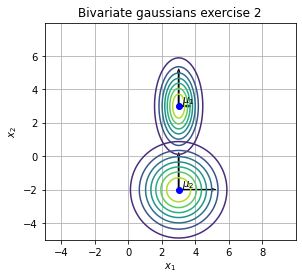

In [8]:
x, y = np.mgrid[-5:10:.01, -5:8:.01]
pos = np.dstack((x, y))

fig, ax = plt.subplots()
fig.gca().set_aspect('equal', adjustable='box')
ax.contour(x, y, omega1.pdf(pos))
ax.contour(x, y, omega2.pdf(pos))

ax.plot(mu1[0], mu1[1], 'bo')
ax.annotate("$\mu_1$", (mu1 + (0.2, 0.2)))

ax.arrow(mu1[0], mu1[1], eigvec1[0, 0], eigvec1[0, 1], width = 0.05)
ax.arrow(mu1[0], mu1[1], eigvec1[1, 0], eigvec1[1, 1], width = 0.05) 

ax.plot(mu2[0], mu2[1], 'bo')
ax.annotate("$\mu_2$", (mu2 + (0.2, 0.2)))

ax.arrow(mu2[0], mu2[1], eigvec2[0, 0], eigvec2[0, 1], width = 0.05)
ax.arrow(mu2[0], mu2[1], eigvec2[1, 0], eigvec2[1, 1], width = 0.05) 

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Bivariate gaussians exercise 2')
ax.grid()

In [9]:
Z = -0.75*x**2 + 4.5*x + 2.5*y - 7.307

In [10]:
Z[Z == 0]

array([], dtype=float64)